In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
plt.style.use('dark_background')
import numpy as np
from pyuvdata import UVCal, UVData, utils
import os
import sys
import glob
import uvtools as uvt
from astropy.time import Time
import pandas

In [12]:
# get data location
data_path = os.environ['DATA_PATH']
#data_path = '/lustre/aoc/projects/hera/lberkhou/Test/2458701'

In [13]:
# get xx and yy files

HHfiles = sorted(glob.glob("{0}/zen.*.*.HH.uvh5".format(data_path)))
difffiles = sorted(glob.glob("{0}/zen.*.*.HH.*.uvh5".format(data_path)))

Nfiles = len(HHfiles)
hhfile_bases = map(os.path.basename, HHfiles)
hhdifffile_bases = map(os.path.basename, difffiles)

#hhfile_times = np.array(map(lambda x: '.'.join(os.path.basename(x).split('.')[1:3]), HHfiles), np.float)
#difffile_times = np.array(map(lambda y: '.'.join(os.path.basename(y).split('.')[1:3]), difffiles), np.float)

# choose one for single-file plots
file_index = np.min([len(HHfiles)-1, 20])

hhfile1 = HHfiles[len(HHfiles)//2]
hhfile2 = HHfiles[len(HHfiles)-1]
hhfile3 = HHfiles[1]
difffile = difffiles[file_index]
#hhfile_base = hhfile_bases[file_index]
#difffile_base = hhdifffile_bases[file_index]
#file_jd = hhfile_times[file_index]

In [14]:
# Load data
uvd_hh = UVData()

uvd_hh.read_uvh5(hhfile1)
uvd_xx1 = uvd_hh.select(polarizations = -5, inplace = False)
uvd_xx1.ants = np.unique(np.concatenate([uvd_xx1.ant_1_array, uvd_xx1.ant_2_array]))
# -5: 'xx', -6: 'yy', -7: 'xy', -8: 'yx'

uvd_hh.read_uvh5(hhfile2)
uvd_xx2 = uvd_hh.select(polarizations = -5, inplace = False)
uvd_xx2.ants = np.unique(np.concatenate([uvd_xx2.ant_1_array, uvd_xx2.ant_2_array]))

uvd_hh.read_uvh5(hhfile3)
uvd_xx3 = uvd_hh.select(polarizations = -5, inplace = False)
uvd_xx3.ants = np.unique(np.concatenate([uvd_xx3.ant_1_array, uvd_xx3.ant_2_array]))

uvd_hh = UVData()

uvd_hh.read_uvh5(hhfile1) 
uvd_yy1 = uvd_hh.select(polarizations = -6, inplace = False)
uvd_yy1.ants = np.unique(np.concatenate([uvd_yy1.ant_1_array, uvd_yy1.ant_2_array]))

uvd_hh.read_uvh5(hhfile2)
uvd_yy2 = uvd_hh.select(polarizations = -6, inplace = False)
uvd_yy2.ants = np.unique(np.concatenate([uvd_yy2.ant_1_array, uvd_yy2.ant_2_array]))

uvd_hh.read_uvh5(hhfile3)
uvd_yy3 = uvd_hh.select(polarizations = -6, inplace = False)
uvd_yy3.ants = np.unique(np.concatenate([uvd_yy3.ant_1_array, uvd_yy3.ant_2_array]))

# Get metadata
freqs = uvd_xx1.freq_array.squeeze() / 1e6
times = uvd_xx1.time_array.reshape(uvd_xx1.Ntimes, uvd_xx1.Nbls)[:, 0]
jd_start = np.floor(times.min())
Nfreqs = len(freqs)
Ntimes = len(times)

antpos, ants = uvd_xx1.get_ENU_antpos(pick_data_ants=False)

#red_bls = hc.get_reds(uvd_xx.get_ENU_antpos(pick_data_ants=False))
ants = sorted(ants)
#ants_red = sorted(np.unique(np.concatenate(red_bls)))
Nants = len(ants)
Nside = int(np.ceil(np.sqrt(Nants)))
Yside = int(np.ceil(float(Nants)/Nside))

divide by zero encountered in log10


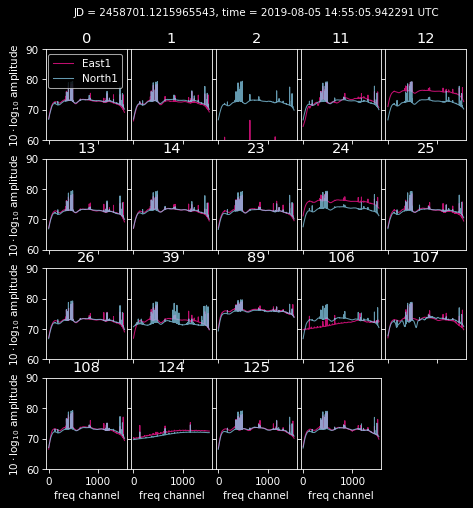

In [15]:
### plot autos
t_index = 0
jd = times[t_index]
utc = Time(jd, format='jd').datetime

xlim = (-50, Nfreqs+50)
ylim = (60, 90)

fig, axes = plt.subplots(Yside, Nside, figsize=(7,7), dpi=75)

fig.suptitle("JD = {0}, time = {1} UTC".format(jd, utc), fontsize=10)
fig.tight_layout(rect=(0, 0, 1, 0.95))
fig.subplots_adjust(left=.1, bottom=.1, right=.9, top=.9, wspace=0.05, hspace=0.2)

k = 0
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        if k < Nants:
            px, = ax.plot(10*np.log10(np.abs(uvd_xx1.get_data((ants[k], ants[k]))[t_index])), color='deeppink', alpha=0.75, linewidth=1)
            py, = ax.plot(10*np.log10(np.abs(uvd_yy1.get_data((ants[k], ants[k]))[t_index])), color='skyblue', alpha=0.75, linewidth=1)
            #px2, = ax.plot(10*np.log10(np.abs(uvd_xx2.get_data((ants[k], ants[k]))[t_index])), color='green', alpha=0.75, linewidth=1)
            #py2, = ax.plot(10*np.log10(np.abs(uvd_yy2.get_data((ants[k], ants[k]))[t_index])), color='yellow', alpha=0.75, linewidth=1)
            #px3, = ax.plot(10*np.log10(np.abs(uvd_xx3.get_data((ants[k], ants[k]))[t_index])), color='rebeccapurple', alpha=0.75, linewidth=1)
            #py3, = ax.plot(10*np.log10(np.abs(uvd_yy3.get_data((ants[k], ants[k]))[t_index])), color='deeppink', alpha=0.75, linewidth=1)
            
            ax.grid(False, which='both')
            ax.set_title(str(ants[k]), fontsize=14)
            
            if k == 0:
                ax.legend([px, py], ['East1', 'North1'])
                #ax.legend([px, py, px2, py2, px3, py3], ['East1', 'North1', 'East2', 'North2', 'East3', 'North3'], fontsize=12)
            
        else:
            ax.axis('off')
        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel(r'$10\cdot\log_{10}$ amplitude', fontsize=10)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            ax.set_xlabel('freq channel', fontsize=10)

        k += 1

In [17]:
def timeseries_data(files, nu_index=500, poli=0):
    print ("gather nightly data for JD = {0}".format(jd_start))
    uv = UVData()
    uv.read(files, ant_str='auto', freq_chans=[nu_index])
    amps = np.abs(uv.data_array[:, 0, 0, poli].reshape(uv.Ntimes, uv.Nants_data,
                                                       np.size(poli)))
    times = np.unique(uv.time_array)
    return np.array(amps).T, np.array(times)

nu_index = 500
amps_timeseries, times = timeseries_data(HHfiles, nu_index=nu_index, poli=[0, 1])

gather nightly data for JD = 2458701.0


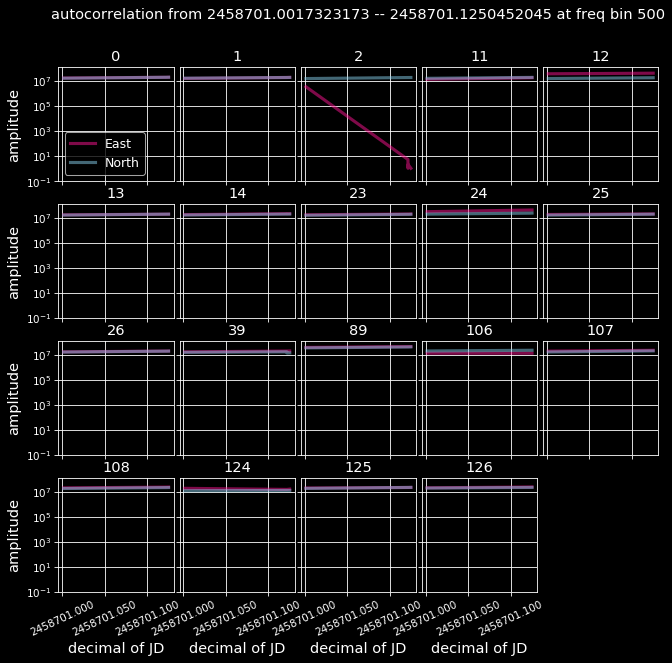

In [18]:
# plot autos
ylim = (0, np.median(np.abs(amps_timeseries))*3)
ylim = (1e-1, np.abs(amps_timeseries).max() * 3)

fig, axes = plt.subplots(Yside, Nside, figsize=(10,10), dpi=75)
fig.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle("autocorrelation from {0} -- {1} at freq bin {2}".format(times[0], times[-1], nu_index), fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
fig.subplots_adjust(left=.1, bottom=.2, right=.9, top=.9, wspace=0.05, hspace=0.2)

k = 0
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        ax.set_ylim(ylim)
        if k < Nants:
            ax.set_yscale('log')
            px, = ax.plot(times, np.abs(amps_timeseries[0, k, :]), color='deeppink', alpha=0.5, linewidth=3)
            py, = ax.plot(times, np.abs(amps_timeseries[1, k, :]), color='skyblue', alpha=0.5, linewidth=3)
            ax.grid(True)
            ax.set_title(str(ants[k]), fontsize=14)
            if k == 0:
                ax.legend([px, py], ['East', 'North'], fontsize=12)
        else:
            ax.axis('off')
        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_yticklabels()]
            ax.set_ylabel('amplitude', fontsize=14)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            [t.set_rotation(25) for t in ax.get_xticklabels()]
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            ax.set_xlabel('decimal of JD', fontsize=14)
        k += 1

In [19]:
def wfs(files, poli=0):
    print ("gather nightly data for JD = {0}".format(jd_start))
    uv = UVData()
    uv.read(files, ant_str='auto')
    amps = np.abs(uv.data_array[:, 0, :, poli].reshape(uv.Ntimes, uv.Nants_data, uv.Nfreqs,
                                                       np.size(poli)))
    times = np.unique(uv.time_array)
    return np.array(amps).T, np.array(times)

amps_timeseries, times = wfs(HHfiles, poli=[0, 1])

gather nightly data for JD = 2458701.0


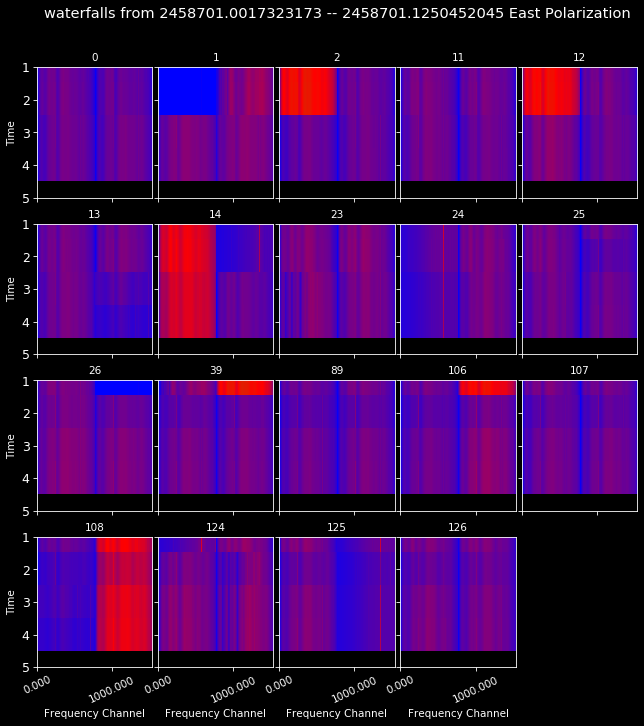

In [26]:
# plot autos
fig, axes = plt.subplots(Yside, Nside, figsize=(10,10), dpi=75)
fig.suptitle("waterfalls from {0} -- {1} East Polarization".format(times[0], times[-1], nu_index), fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
fig.subplots_adjust(left=.1, bottom=.1, right=.9, top=.9, wspace=0.05, hspace=0.2)

k = 0
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        ax.set_ylim(len(times))
        if k < Nants:
            #ax.set_yscale('log')
            ax.imshow(amps_timeseries[0, :, k, :].T, aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #plt.imshow(amps_timeseries[1, :, k, :].T, aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #ax.grid(True)
            #ax.colorbar()
            ax.set_title(str(ants[k]), fontsize=10)
            #if k == 0:
            #    ax.legend([px, py], ['East', 'North'], fontsize=12)
        else:
            ax.axis('off')
        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(12) for t in ax.get_yticklabels()]
            ax.set_ylabel('Time', fontsize=10)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            [t.set_rotation(25) for t in ax.get_xticklabels()]
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            ax.set_xlabel('Frequency Channel', fontsize=10)
        k += 1

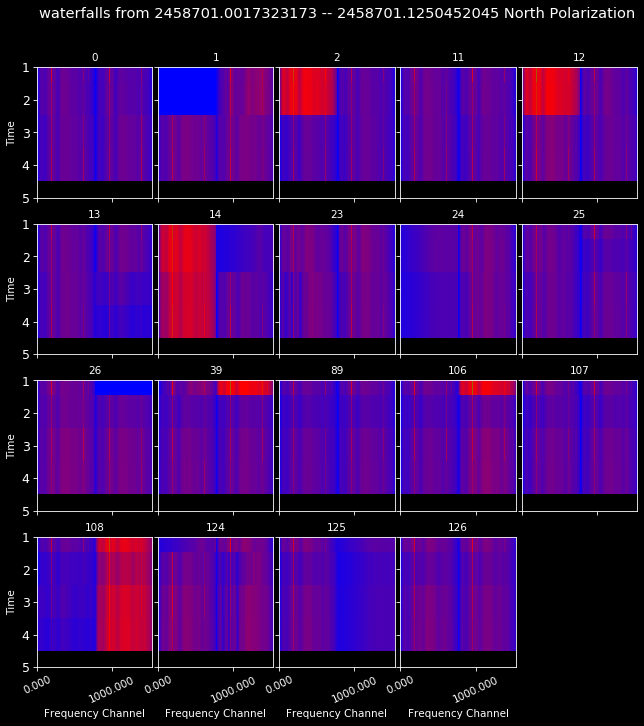

In [25]:
# plot autos
fig, axes = plt.subplots(Yside, Nside, figsize=(10,10), dpi=75)
fig.suptitle("waterfalls from {0} -- {1} North Polarization".format(times[0], times[-1], nu_index), fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
fig.subplots_adjust(left=.1, bottom=.1, right=.9, top=.9, wspace=0.05, hspace=0.2)

k = 0
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        ax.set_ylim(len(times))
        if k < Nants:
            #ax.set_yscale('log')
            ax.imshow(amps_timeseries[1, :, k, :].T, aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #plt.imshow(amps_timeseries[1, :, k, :].T, aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #ax.grid(True)
            #ax.colorbar()
            ax.set_title(str(ants[k]), fontsize=10)
            #if k == 0:
            #    ax.legend([px, py], ['East', 'North'], fontsize=12)
        else:
            ax.axis('off')
        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(12) for t in ax.get_yticklabels()]
            ax.set_ylabel('Time', fontsize=10)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            [t.set_rotation(25) for t in ax.get_xticklabels()]
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            ax.set_xlabel('Frequency Channel', fontsize=10)
        k += 1

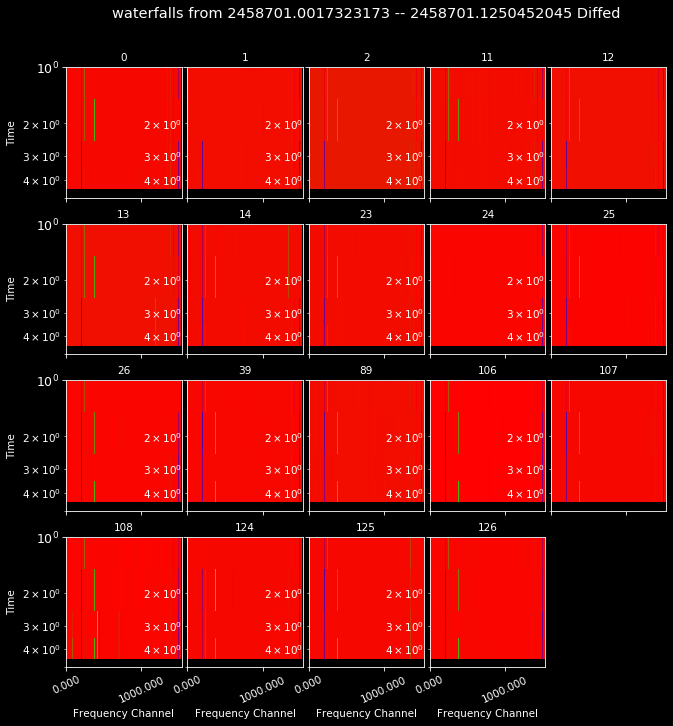

In [27]:
fig, axes = plt.subplots(Yside, Nside, figsize=(10,10), dpi=75)
fig.suptitle("waterfalls from {0} -- {1} Diffed".format(times[0], times[-1], nu_index), fontsize=14)
fig.tight_layout(rect=(0, 0, 1, 0.95))
fig.subplots_adjust(left=.1, bottom=.1, right=.9, top=.9, wspace=0.05, hspace=0.2)

k = 0
for i in range(Yside):
    for j in range(Nside):
        ax = axes[i,j]
        ax.set_ylim(len(times))
        if k < Nants:
            ax.set_yscale('log')
            ax.imshow((amps_timeseries[0, :, k, :].T - amps_timeseries[1, :, k, :].T), aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #plt.imshow(amps_timeseries[1, :, k, :].T, aspect='auto', rasterized=True, interpolation='nearest', cmap='brg',)
            #ax.grid(True)
            #ax.colorbar()
            ax.set_title(str(ants[k]), fontsize=10)
            #if k == 0:
            #    ax.legend([px, py], ['East', 'North'], fontsize=12)
        else:
            ax.axis('off')
        if j != 0:
            ax.set_yticklabels([])
        else:
            [t.set_fontsize(12) for t in ax.get_yticklabels()]
            ax.set_ylabel('Time', fontsize=10)
        if i != Yside-1:
            ax.set_xticklabels([])
        else:
            [t.set_fontsize(10) for t in ax.get_xticklabels()]
            [t.set_rotation(25) for t in ax.get_xticklabels()]
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            ax.set_xlabel('Frequency Channel', fontsize=10)
        k += 1